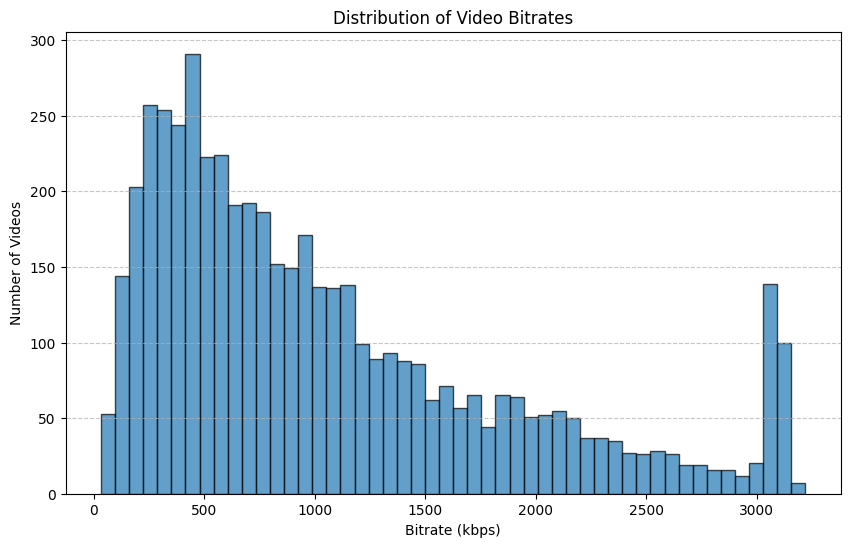

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = "video_bitrate.txt"
df = pd.read_csv(file_path, sep=" ", header=None, names=["path", "bitrate_kbps"], usecols=[0, 1])

# 转换数据类型
df["bitrate_kbps"] = df["bitrate_kbps"].astype(float)

# 绘制码率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df["bitrate_kbps"], bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Bitrate (kbps)")
plt.ylabel("Number of Videos")
plt.title("Distribution of Video Bitrates")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 显示图表
plt.show()

In [ ]:
import pandas as pd
import os

# 读取视频码率数据
file_path = "video_bitrate.txt"
df = pd.read_csv(file_path, sep=" ", header=None, names=["path", "bitrate_kbps"], usecols=[0, 1])

# 转换数据类型
df["bitrate_kbps"] = df["bitrate_kbps"].astype(float)

### **📌 方法 1：手动分桶**
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, float("inf")]  # 码率区间
labels = [
    "Low (<500 kbps)", "Medium-Low (500-1000 kbps)", "Medium (1000-1500 kbps)", "Medium (1500-2000 kbps)",
    "High (2000-2500 kbps)", "High (2500-3000 kbps)", "High (3000-3500 kbps)", "High (3500-4000 kbps)", "Ultra High (>4000 kbps)"
]

df["bucket"] = pd.cut(df["bitrate_kbps"], bins=bins, labels=labels, right=True)

### **📌 方法 2：等宽分桶（10个区间）**
df["equal_width_bin"] = pd.cut(df["bitrate_kbps"], bins=10)

### **📌 方法 3：等频分桶（5个区间，每个桶大小相等）**
df["equal_freq_bin"] = pd.qcut(df["bitrate_kbps"], q=5, duplicates='drop')

# 显示桶的统计信息
bucket_counts = df["bucket"].value_counts().sort_index()

print("📊 视频码率分桶统计：")
print(bucket_counts)

# 按桶将视频路径分别保存到不同的文件中
output_dir = "video_buckets"
os.makedirs(output_dir, exist_ok=True)

# 新做法：遍历预先定义的所有桶标签
for bucket_label in labels:
    bucket_videos = df[df["bucket"] == bucket_label]["path"]

    # 统一处理：把特殊字符替换成下划线等
    bucket_filename = os.path.join(
        output_dir,
        f"{bucket_label.replace(' ', '_').replace('<', '').replace('>', '').replace('(', '').replace(')', '').replace('-', '_')}.txt"
    )

    bucket_videos.to_csv(bucket_filename, index=False, header=False)
    print(f"✅ 已保存 {len(bucket_videos)} 个视频到 {bucket_filename}")


📊 视频码率分桶统计：
bucket
Low (<500 kbps)               1525
Medium-Low (500-1000 kbps)    1429
Medium (1000-1500 kbps)        847
Medium (1500-2000 kbps)        473
High (2000-2500 kbps)          315
High (2500-3000 kbps)          153
High (3000-3500 kbps)          258
High (3500-4000 kbps)            0
Ultra High (>4000 kbps)          0
Name: count, dtype: int64
✅ 已保存 847 个视频到 video_buckets/Medium_1000_1500_kbps.txt
✅ 已保存 1429 个视频到 video_buckets/Medium_Low_500_1000_kbps.txt
✅ 已保存 1525 个视频到 video_buckets/Low_500_kbps.txt
✅ 已保存 258 个视频到 video_buckets/High_3000_3500_kbps.txt
✅ 已保存 153 个视频到 video_buckets/High_2500_3000_kbps.txt
✅ 已保存 315 个视频到 video_buckets/High_2000_2500_kbps.txt
✅ 已保存 473 个视频到 video_buckets/Medium_1500_2000_kbps.txt


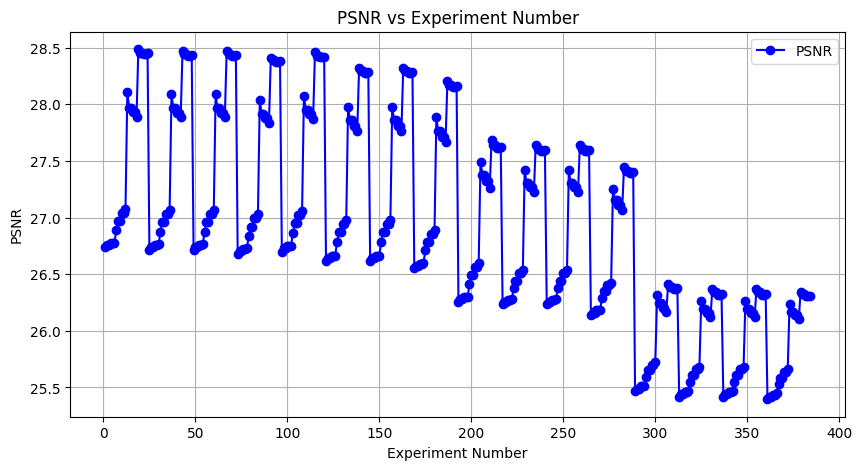

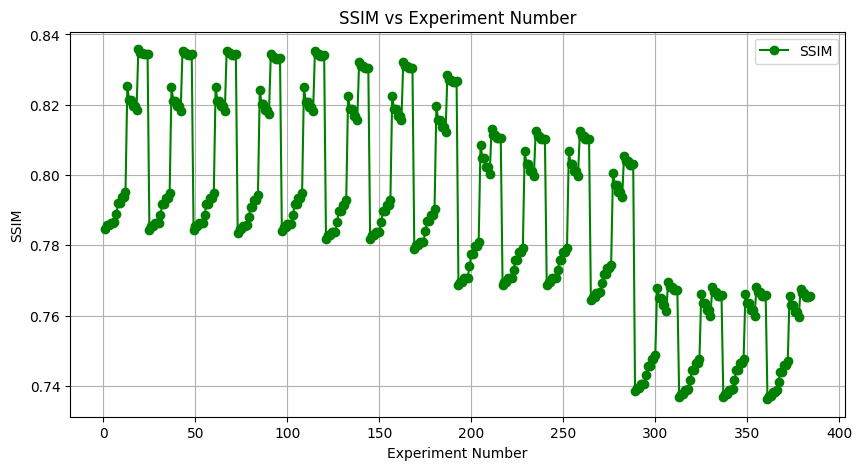

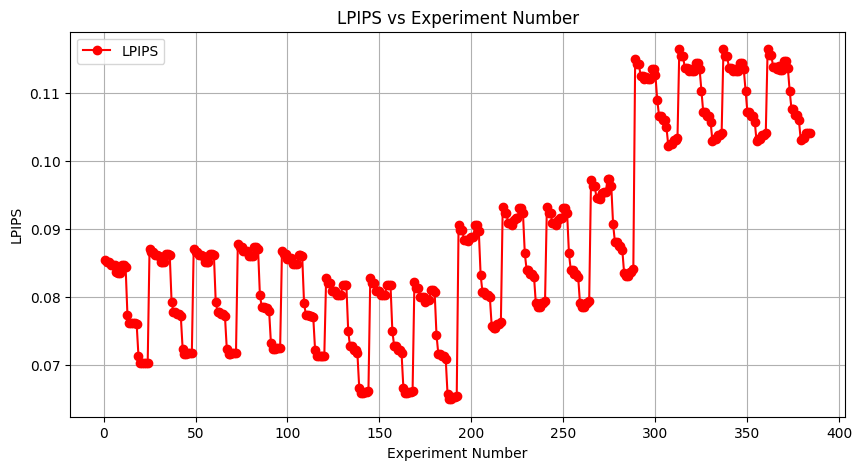

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 确保路径正确
metrics_dir = "/mnt/public/wangsiyuan/HunyuanVideo_efficiency/analysis/one_true_pool_metrics"

if not os.path.exists(metrics_dir):
    raise FileNotFoundError(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")

# 存储数据
data = []

# 遍历每个 exp 目录
for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
    exp_path = os.path.join(metrics_dir, exp_folder)
    if os.path.isdir(exp_path):
        # 找到 txt 文件
        for file in os.listdir(exp_path):
            if file.endswith(".txt"):
                file_path = os.path.join(exp_path, file)
                with open(file_path, "r") as f:
                    content = f.readlines()
                    # 解析 PSNR, SSIM, LPIPS
                    psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                    ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                    lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                    exp_number = int(exp_folder.replace("exp_", ""))
                    data.append([exp_number, psnr, ssim, lpips])

# 转换为 DataFrame
df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])
df = df.sort_values("exp")

# 画 PSNR 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["PSNR"], marker="o", linestyle="-", label="PSNR", color="blue")
plt.xlabel("Experiment Number")
plt.ylabel("PSNR")
plt.title("PSNR vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 SSIM 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["SSIM"], marker="o", linestyle="-", label="SSIM", color="green")
plt.xlabel("Experiment Number")
plt.ylabel("SSIM")
plt.title("SSIM vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 LPIPS 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["LPIPS"], marker="o", linestyle="-", label="LPIPS", color="red")
plt.xlabel("Experiment Number")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import pandas as pd

# 假设 df 已经包含了所有实验数据
# df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])

# 1. 分别给 PSNR、SSIM、LPIPS 排名：
#    - PSNR, SSIM：值越大越好 -> ascending=False
#    - LPIPS     ：值越小越好 -> ascending=True

df["PSNR_rank"] = df["PSNR"].rank(method='dense', ascending=False)
df["SSIM_rank"] = df["SSIM"].rank(method='dense', ascending=False)
df["LPIPS_rank"] = df["LPIPS"].rank(method='dense', ascending=True)

# 2. 将排名分数求和，得到综合分数
df["total_rank"] = df["PSNR_rank"] + df["SSIM_rank"] + df["LPIPS_rank"]

# 3. 按综合分数排序
df = df.sort_values(by="total_rank")

# 4. 取出前 5 名
top_5 = df.head(5)

print("综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：")
print(top_5[["exp", "PSNR", "SSIM", "LPIPS", "PSNR_rank", "SSIM_rank", "LPIPS_rank", "total_rank"]])


综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：
    exp       PSNR      SSIM     LPIPS  PSNR_rank  SSIM_rank  LPIPS_rank  \
18   19  28.485743  0.835782  0.071319        1.0        1.0        15.0   
19   20  28.452957  0.834810  0.070299        4.0        4.0         9.0   
20   21  28.452957  0.834810  0.070299        4.0        4.0         9.0   
23   24  28.448560  0.834494  0.070329        5.0        6.0        10.0   
22   23  28.443308  0.834441  0.070337        6.0        8.0        11.0   

    total_rank  
18        17.0  
19        17.0  
20        17.0  
23        21.0  
22        25.0  


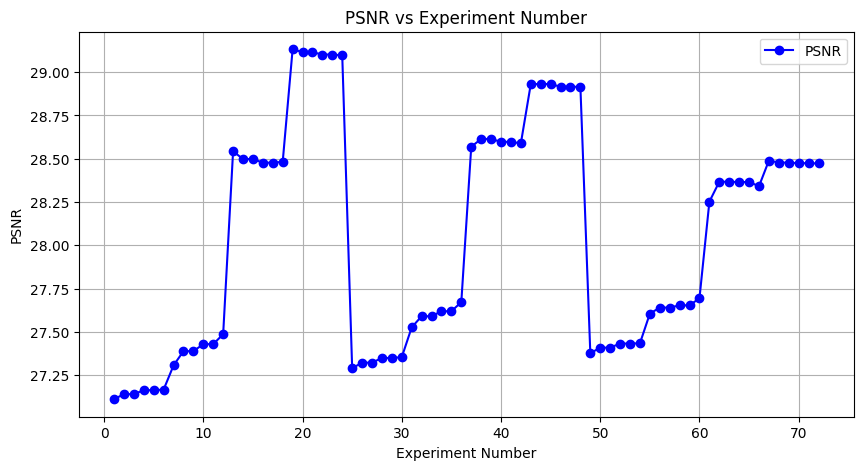

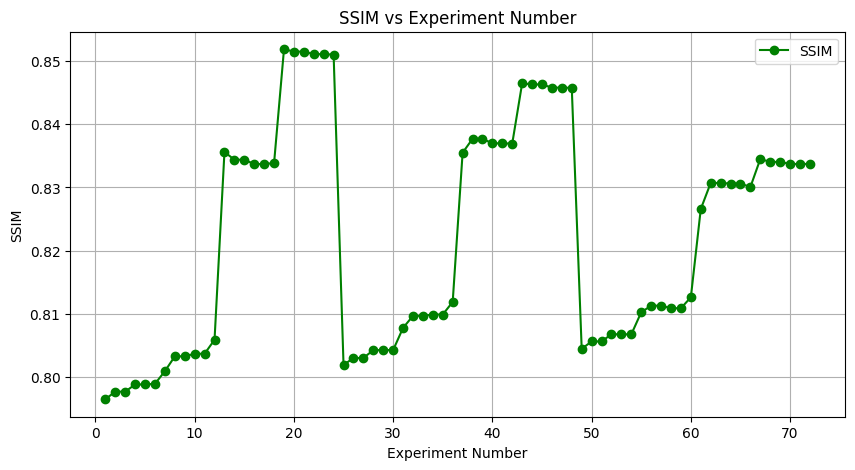

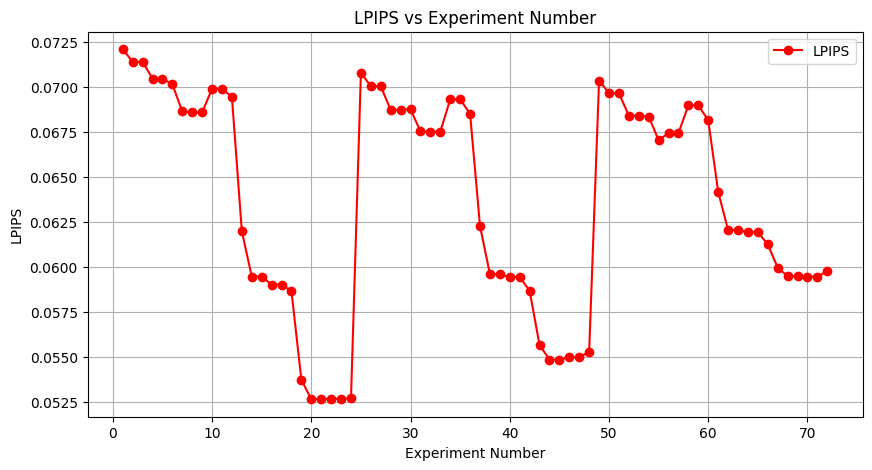

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 确保路径正确
metrics_dir = "/mnt/public/wangsiyuan/HunyuanVideo_efficiency/analysis/one_true_stride_metrics"

if not os.path.exists(metrics_dir):
    raise FileNotFoundError(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")

# 存储数据
data = []

# 遍历每个 exp 目录
for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
    exp_path = os.path.join(metrics_dir, exp_folder)
    if os.path.isdir(exp_path):
        # 找到 txt 文件
        for file in os.listdir(exp_path):
            if file.endswith(".txt"):
                file_path = os.path.join(exp_path, file)
                with open(file_path, "r") as f:
                    content = f.readlines()
                    # 解析 PSNR, SSIM, LPIPS
                    psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                    ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                    lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                    exp_number = int(exp_folder.replace("exp_", ""))
                    data.append([exp_number, psnr, ssim, lpips])

# 转换为 DataFrame
df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])
df = df.sort_values("exp")

# 画 PSNR 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["PSNR"], marker="o", linestyle="-", label="PSNR", color="blue")
plt.xlabel("Experiment Number")
plt.ylabel("PSNR")
plt.title("PSNR vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 SSIM 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["SSIM"], marker="o", linestyle="-", label="SSIM", color="green")
plt.xlabel("Experiment Number")
plt.ylabel("SSIM")
plt.title("SSIM vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 LPIPS 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["LPIPS"], marker="o", linestyle="-", label="LPIPS", color="red")
plt.xlabel("Experiment Number")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()


In [6]:
import pandas as pd

# 假设 df 已经包含了所有实验数据
# df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])

# 1. 分别给 PSNR、SSIM、LPIPS 排名：
#    - PSNR, SSIM：值越大越好 -> ascending=False
#    - LPIPS     ：值越小越好 -> ascending=True

df["PSNR_rank"] = df["PSNR"].rank(method='dense', ascending=False)
df["SSIM_rank"] = df["SSIM"].rank(method='dense', ascending=False)
df["LPIPS_rank"] = df["LPIPS"].rank(method='dense', ascending=True)

# 2. 将排名分数求和，得到综合分数
df["total_rank"] = df["PSNR_rank"] + df["SSIM_rank"] + df["LPIPS_rank"]

# 3. 按综合分数排序
df = df.sort_values(by="total_rank")

# 4. 取出前 5 名
top_5 = df.head(5)

print("综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：")
print(top_5[["exp", "PSNR", "SSIM", "LPIPS", "PSNR_rank", "SSIM_rank", "LPIPS_rank", "total_rank"]])


综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：
    exp       PSNR      SSIM     LPIPS  PSNR_rank  SSIM_rank  LPIPS_rank  \
19   20  29.115229  0.851478  0.052632        2.0        2.0         1.0   
20   21  29.115229  0.851478  0.052632        2.0        2.0         1.0   
18   19  29.132554  0.851853  0.053714        1.0        1.0         4.0   
21   22  29.101877  0.851073  0.052656        3.0        3.0         2.0   
22   23  29.101877  0.851073  0.052656        3.0        3.0         2.0   

    total_rank  
19         5.0  
20         5.0  
18         6.0  
21         8.0  
22         8.0  


✅ 解析 High_2500_3000_kbps 成功，实验数量: 72
✅ 解析 High_3000_3500_kbps 成功，实验数量: 72
✅ 解析 Low_500_kbps 成功，实验数量: 72
✅ 解析 Medium_1500_2000_kbps 成功，实验数量: 72


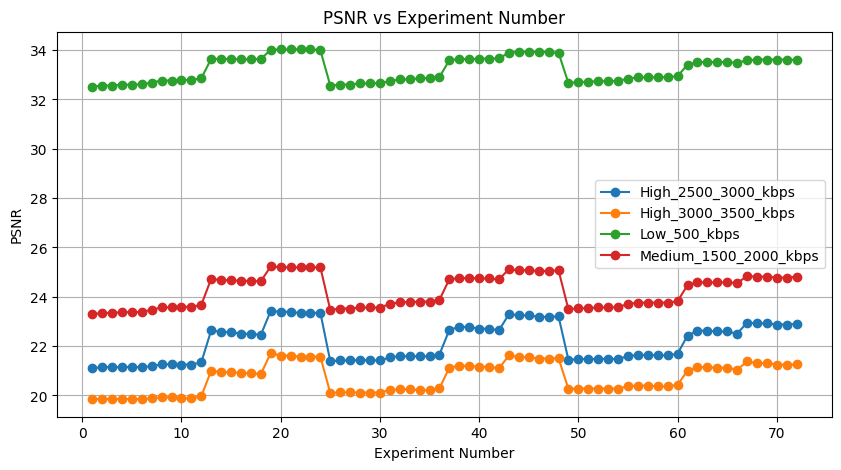

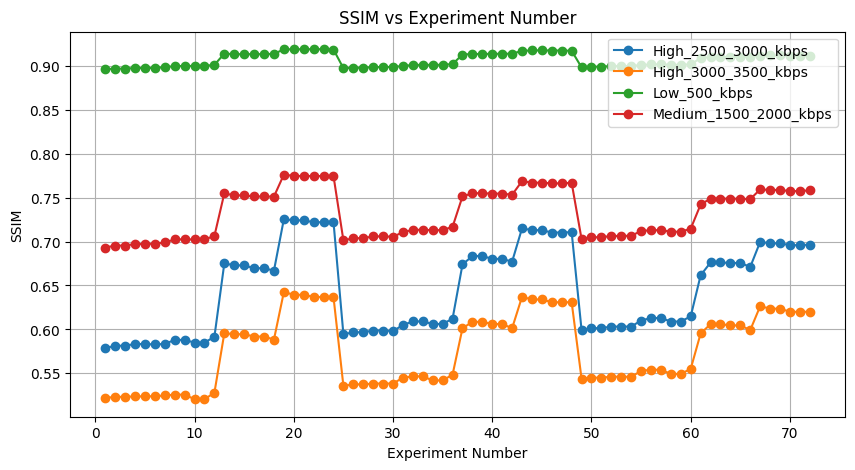

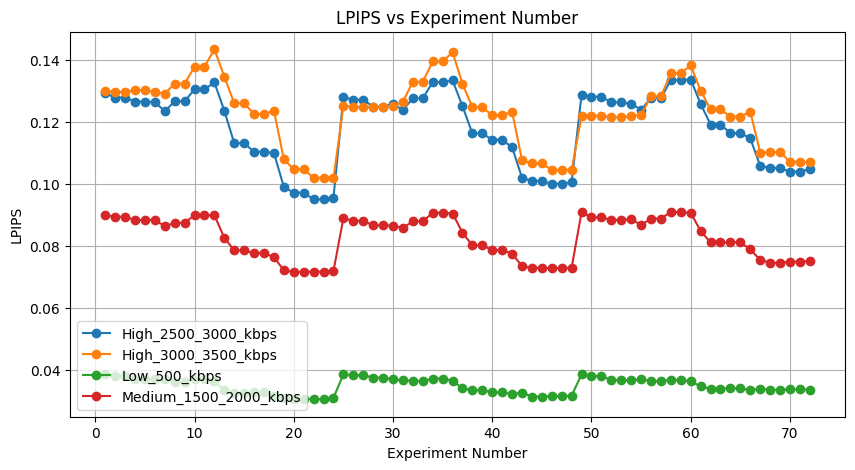

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义四个数据目录
metrics_dirs = {
    "High_2500_3000_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/High_2500_3000_kbps",
    "High_3000_3500_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/High_3000_3500_kbps",
    "Low_500_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/Low_500_kbps",
    "Medium_1500_2000_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/Medium_1500_2000_kbps",
}

# 存储所有数据
all_data = {key: [] for key in metrics_dirs.keys()}

# 遍历每个目录
for label, metrics_dir in metrics_dirs.items():
    if not os.path.exists(metrics_dir):
        print(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")
        continue

    # 遍历每个 exp 目录
    for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
        exp_path = os.path.join(metrics_dir, exp_folder)
        if os.path.isdir(exp_path):
            # 找到 txt 文件
            for file in os.listdir(exp_path):
                if file.endswith(".txt"):
                    file_path = os.path.join(exp_path, file)
                    with open(file_path, "r") as f:
                        content = f.readlines()
                        try:
                            # 解析 PSNR, SSIM, LPIPS
                            psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                            ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                            lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                            exp_number = int(exp_folder.replace("exp_", ""))
                            all_data[label].append([exp_number, psnr, ssim, lpips])
                        except (IndexError, ValueError) as e:
                            print(f"❌ 解析失败: {file_path}, 错误: {e}")

# 生成 DataFrame
dfs = {}
for key, data in all_data.items():
    if data:
        dfs[key] = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"]).sort_values("exp")
        print(f"✅ 解析 {key} 成功，实验数量: {len(dfs[key])}")
    else:
        print(f"⚠️ 解析 {key} 失败，数据为空！")

# 画图函数
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(10, 5))
    has_data = False
    for label, df in dfs.items():
        if metric in df:
            plt.plot(df["exp"], df[metric], marker="o", linestyle="-", label=label)
            has_data = True
    plt.xlabel("Experiment Number")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    if has_data:
        plt.show()
    else:
        print(f"⚠️ 没有可用的 {metric} 数据，跳过绘图。")

# 画 PSNR, SSIM, LPIPS 图
plot_metric("PSNR", "PSNR", "PSNR vs Experiment Number")
plot_metric("SSIM", "SSIM", "SSIM vs Experiment Number")
plot_metric("LPIPS", "LPIPS", "LPIPS vs Experiment Number")

✅ 解析 High_2500_3000_kbps 成功，实验数量: 381
✅ 解析 High_3000_3500_kbps 成功，实验数量: 384
✅ 解析 Low_500_kbps 成功，实验数量: 384
✅ 解析 Medium_1500_2000_kbps 成功，实验数量: 384


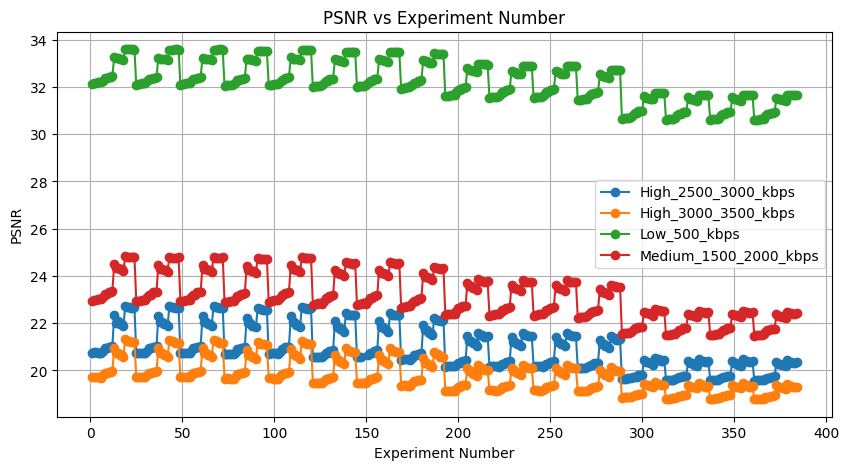

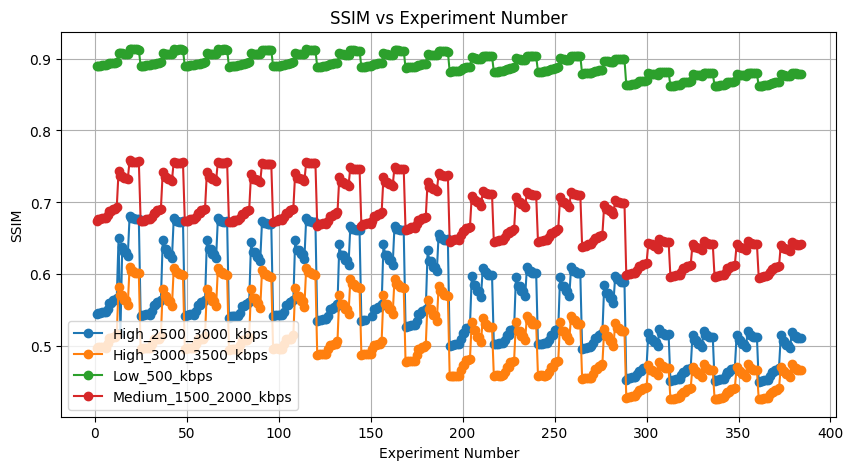

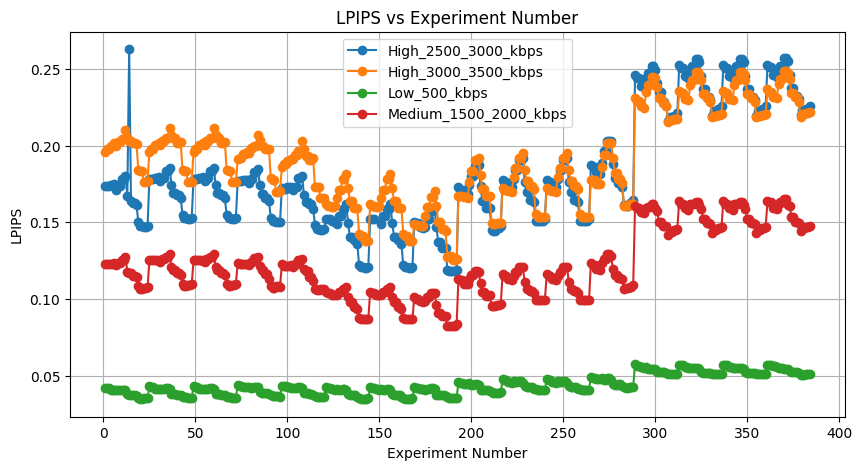

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义四个数据目录
metrics_dirs = {
    "High_2500_3000_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/High_2500_3000_kbps",
    "High_3000_3500_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/High_3000_3500_kbps",
    "Low_500_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/Low_500_kbps",
    "Medium_1500_2000_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/Medium_1500_2000_kbps",
}

# 存储所有数据
all_data = {key: [] for key in metrics_dirs.keys()}

# 遍历每个目录
for label, metrics_dir in metrics_dirs.items():
    if not os.path.exists(metrics_dir):
        print(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")
        continue

    # 遍历每个 exp 目录
    for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
        exp_path = os.path.join(metrics_dir, exp_folder)
        if os.path.isdir(exp_path):
            # 找到 txt 文件
            for file in os.listdir(exp_path):
                if file.endswith(".txt"):
                    file_path = os.path.join(exp_path, file)
                    with open(file_path, "r") as f:
                        content = f.readlines()
                        try:
                            # 解析 PSNR, SSIM, LPIPS
                            psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                            ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                            lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                            exp_number = int(exp_folder.replace("exp_", ""))
                            all_data[label].append([exp_number, psnr, ssim, lpips])
                        except (IndexError, ValueError) as e:
                            print(f"❌ 解析失败: {file_path}, 错误: {e}")

# 生成 DataFrame
dfs = {}
for key, data in all_data.items():
    if data:
        dfs[key] = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"]).sort_values("exp")
        print(f"✅ 解析 {key} 成功，实验数量: {len(dfs[key])}")
    else:
        print(f"⚠️ 解析 {key} 失败，数据为空！")

# 画图函数
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(10, 5))
    has_data = False
    for label, df in dfs.items():
        if metric in df:
            plt.plot(df["exp"], df[metric], marker="o", linestyle="-", label=label)
            has_data = True
    plt.xlabel("Experiment Number")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    if has_data:
        plt.show()
    else:
        print(f"⚠️ 没有可用的 {metric} 数据，跳过绘图。")

# 画 PSNR, SSIM, LPIPS 图
plot_metric("PSNR", "PSNR", "PSNR vs Experiment Number")
plot_metric("SSIM", "SSIM", "SSIM vs Experiment Number")
plot_metric("LPIPS", "LPIPS", "LPIPS vs Experiment Number")

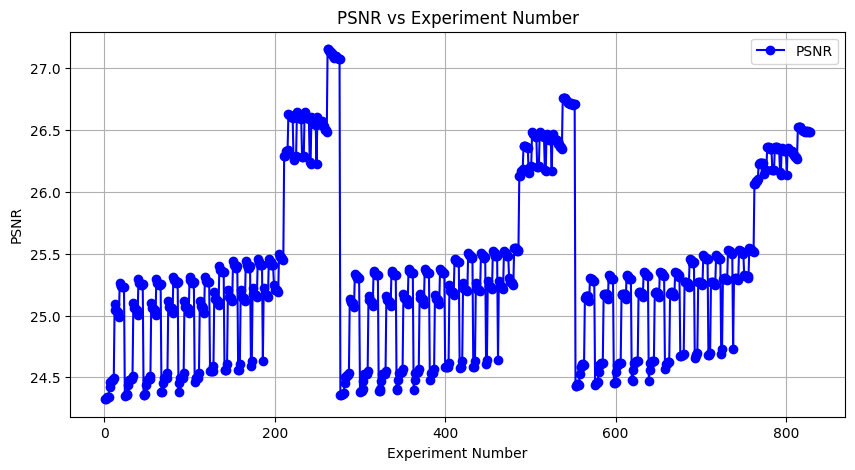

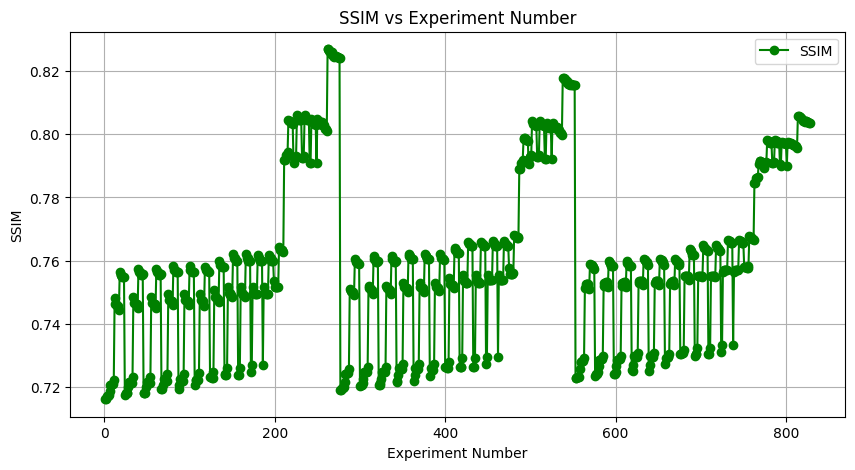

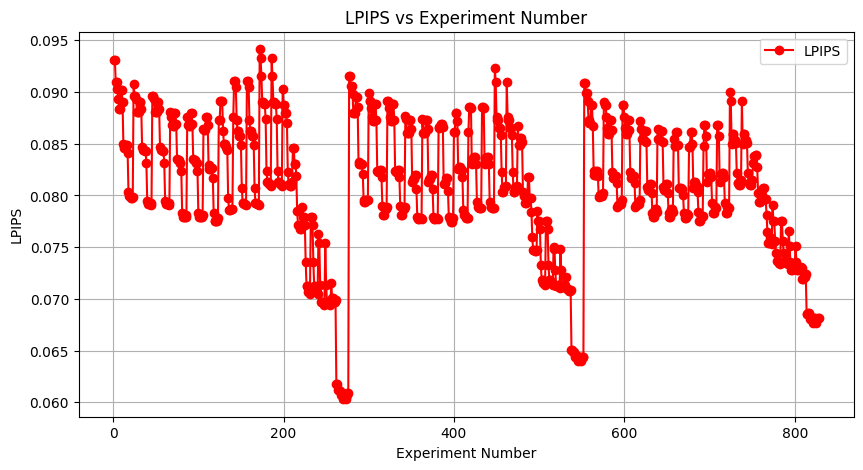

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 确保路径正确
metrics_dir = "/mnt/public/wangsiyuan/HunyuanVideo_efficiency/analysis/two_true_stride_metrics"

if not os.path.exists(metrics_dir):
    raise FileNotFoundError(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")

# 存储数据
data = []

# 遍历每个 exp 目录
for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
    exp_path = os.path.join(metrics_dir, exp_folder)
    if os.path.isdir(exp_path):
        # 找到 txt 文件
        for file in os.listdir(exp_path):
            if file.endswith(".txt"):
                file_path = os.path.join(exp_path, file)
                with open(file_path, "r") as f:
                    content = f.readlines()
                    # 解析 PSNR, SSIM, LPIPS
                    psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                    ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                    lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                    exp_number = int(exp_folder.replace("exp_", ""))
                    data.append([exp_number, psnr, ssim, lpips])

# 转换为 DataFrame
df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])
df = df.sort_values("exp")

# 画 PSNR 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["PSNR"], marker="o", linestyle="-", label="PSNR", color="blue")
plt.xlabel("Experiment Number")
plt.ylabel("PSNR")
plt.title("PSNR vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 SSIM 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["SSIM"], marker="o", linestyle="-", label="SSIM", color="green")
plt.xlabel("Experiment Number")
plt.ylabel("SSIM")
plt.title("SSIM vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 LPIPS 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["LPIPS"], marker="o", linestyle="-", label="LPIPS", color="red")
plt.xlabel("Experiment Number")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()


In [6]:
import pandas as pd

# 假设 df 已经包含了所有实验数据
# df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])

# 1. 分别给 PSNR、SSIM、LPIPS 排名：
#    - PSNR, SSIM：值越大越好 -> ascending=False
#    - LPIPS     ：值越小越好 -> ascending=True

df["PSNR_rank"] = df["PSNR"].rank(method='dense', ascending=False)
df["SSIM_rank"] = df["SSIM"].rank(method='dense', ascending=False)
df["LPIPS_rank"] = df["LPIPS"].rank(method='dense', ascending=True)

# 2. 将排名分数求和，得到综合分数
df["total_rank"] = df["PSNR_rank"] + df["SSIM_rank"] + df["LPIPS_rank"]

# 3. 按综合分数排序
df = df.sort_values(by="total_rank")

# 4. 取出前 5 名
top_5 = df.head(5)

print("综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：")
print(top_5[["exp", "PSNR", "SSIM", "LPIPS", "PSNR_rank", "SSIM_rank", "LPIPS_rank", "total_rank"]])


综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：
     exp       PSNR      SSIM     LPIPS  PSNR_rank  SSIM_rank  LPIPS_rank  \
261  262  27.153325  0.826807  0.061804        1.0        1.0         8.0   
262  263  27.153325  0.826807  0.061804        1.0        1.0         8.0   
263  264  27.139139  0.826228  0.061207        2.0        2.0         7.0   
266  267  27.119177  0.825777  0.060971        3.0        3.0         5.0   
264  265  27.139139  0.826228  0.061207        2.0        2.0         7.0   

     total_rank  
261        10.0  
262        10.0  
263        11.0  
266        11.0  
264        11.0  


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 1D 因果卷积（非对称填充实现）
class CausalConv1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        super(CausalConv1D, self).__init__()
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = kernel_size - 1  # 计算左侧填充量 (右侧填充为0)

        # 这里 padding=0，因为我们会手动填充
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # 进行非对称填充 (左填充 `kernel_size-1`, 右填充 `0`)
        x = F.pad(x, (self.padding, 0))  # 仅在左侧填充
        out = self.conv(x)
        return out

# **测试代码**
# 创建输入数据（Batch=1, Channels=1, Length=6）
x = torch.tensor([[1, 2, 3, 4, 5, 6]], dtype=torch.float32).unsqueeze(0)  # [1, 1, 6]
print("输入数据形状:", x.shape)  # 预期 [1, 1, 6]

# **初始化因果卷积**
kernel_size = 3
stride = 2
model = CausalConv1D(in_channels=1, out_channels=1, kernel_size=kernel_size, stride=stride)

# **计算输出**
y = model(x)

print("输出数据形状:", y.shape)  # 观察输出形状
print("输出数据:", y.squeeze().detach().numpy())  # 打印输出数据


输入数据形状: torch.Size([1, 1, 6])
输出数据形状: torch.Size([1, 1, 3])
输出数据: [-0.5160867 -1.3366662 -1.8869132]
